In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from cell import Cell
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import copy

 32%|███▏      | 317/1000 [00:02<00:04, 157.88‰/s]

Cell size at treatment start: 1.1642522820441452


100%|██████████| 1000/1000 [00:06<00:00, 162.55‰/s]


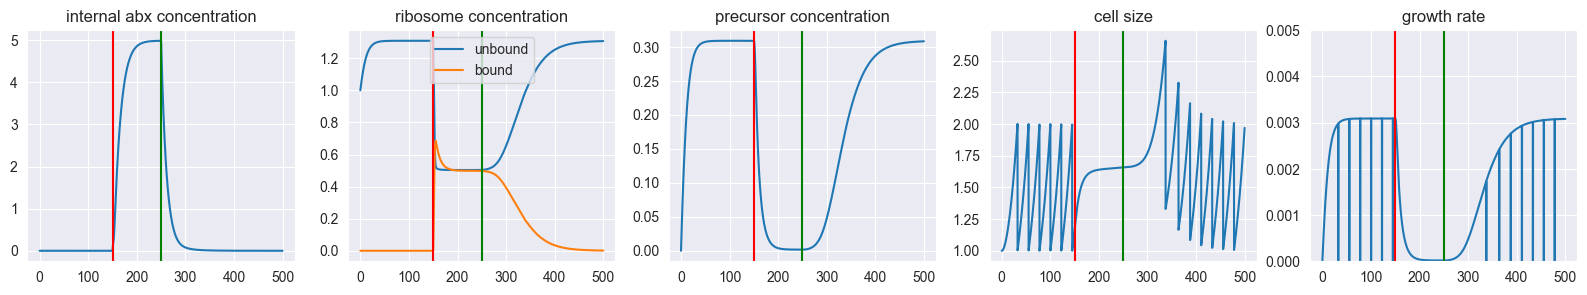

In [4]:
time_step = 0.1
admin_time = 150
recovery_time = 250
param1 = {"ribo_min": 0.5, 
          "p_in": 0.01, 
          "p_out": 0.01, 
          "k_on": 3, 
          "k_off": 0.1, 
          "alpha": 0.05, # ribosome synthesis rate
          "beta": 0.05, # translation rate
          "gama": 0.1, # cell wall synthesis rate
          "abx_env": 5, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim1 = Cell(**param1)
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
length = 500
t_eval = np.arange(0, length, time_step)
time_series1 = my_sim1.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)
fig, axes = plt.subplots(1, 5, figsize=(20, 3))
axes[0].plot(time_series1.t, time_series1.y[0])
axes[0].axvline(admin_time, c='r')
axes[0].axvline(recovery_time, c='g')
axes[0].set_title("internal abx concentration")
axes[1].plot(time_series1.t, time_series1.y[1], label="unbound")
axes[1].plot(time_series1.t, time_series1.y[2], label="bound")
axes[1].axvline(admin_time, c='r')
axes[1].axvline(recovery_time, c='g')
axes[1].legend()
axes[1].set_title("ribosome concentration")
axes[2].plot(time_series1.t, time_series1.y[3])
axes[2].axvline(admin_time, c='r')
axes[2].axvline(recovery_time, c='g')
axes[2].set_title("precursor concentration")
axes[3].plot(time_series1.t, time_series1.y[4])
axes[3].axvline(admin_time, c='r')
axes[3].axvline(recovery_time, c='g')
axes[3].set_title("cell size")
axes[4].plot(time_series1.t, np.gradient(np.log(time_series1.y[4])))
axes[4].axvline(admin_time, c='r')
axes[4].axvline(recovery_time, c='g')
axes[4].set_ylim(0., 0.005)
axes[4].set_title("growth rate")
plt.show()

## Slow unbinding

 32%|███▏      | 323/1000 [00:01<00:04, 155.03‰/s]

Cell size at treatment start: 1.1642522820441452


100%|██████████| 1000/1000 [00:05<00:00, 166.93‰/s]


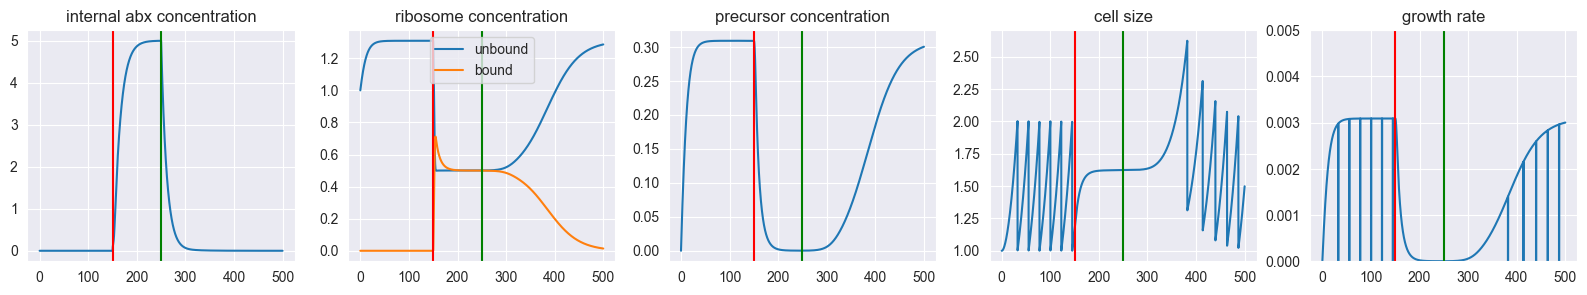

In [5]:
admin_time = 150
recovery_time = 250
param2 = {"ribo_min": 0.5, 
          "p_in": 0.01, 
          "p_out": 0.01, 
          "k_on": 3, 
          "k_off": 0.01, 
          "alpha": 0.05, # ribosome synthesis rate
          "beta": 0.05, # translation rate
          "gama": 0.1, # cell wall synthesis rate
          "abx_env": 5, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim2 = Cell(**param2)
length = 500
t_eval = np.arange(0, length, time_step)
time_series2 = my_sim2.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))
axes[0].plot(time_series2.t, time_series2.y[0])
axes[0].axvline(admin_time, c='r')
axes[0].axvline(recovery_time, c='g')
axes[0].set_title("internal abx concentration")
axes[1].plot(time_series2.t, time_series2.y[1], label="unbound")
axes[1].plot(time_series2.t, time_series2.y[2], label="bound")
axes[1].axvline(admin_time, c='r')
axes[1].axvline(recovery_time, c='g')
axes[1].legend()
axes[1].set_title("ribosome concentration")
axes[2].plot(time_series2.t, time_series2.y[3])
axes[2].axvline(admin_time, c='r')
axes[2].axvline(recovery_time, c='g')
axes[2].set_title("precursor concentration")
axes[3].plot(time_series2.t, time_series2.y[4])
axes[3].axvline(admin_time, c='r')
axes[3].axvline(recovery_time, c='g')
axes[3].set_title("cell size")
axes[4].plot(time_series2.t, np.gradient(np.log(time_series2.y[4])))
axes[4].axvline(admin_time, c='r')
axes[4].axvline(recovery_time, c='g')
axes[4].set_ylim(0., 0.005)
axes[4].set_title("growth rate")
plt.show()

## bigger cell size

 28%|██▊       | 277/1000 [00:01<00:05, 138.04‰/s]

Cell size at treatment start: 1.1642522820441452


100%|█████████▉| 999/1000 [00:07<00:00, 139.84‰/s]


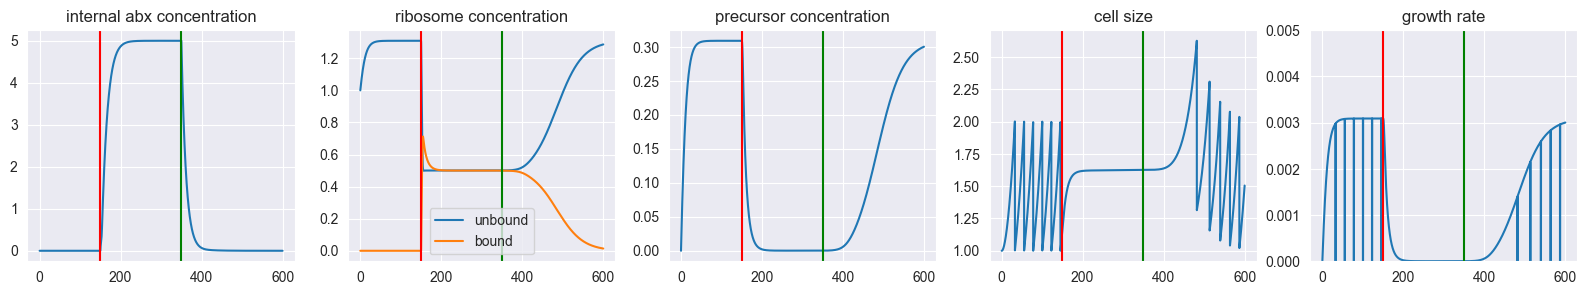

In [7]:
admin_time = 150
recovery_time = 350
param2 = {"ribo_min": 0.5, 
          "p_in": 0.01, 
          "p_out": 0.01, 
          "k_on": 3, 
          "k_off": 0.01, 
          "alpha": 0.05, # ribosome synthesis rate
          "beta": 0.05, # translation rate
          "gama": 0.1, # cell wall synthesis rate
          "abx_env": 5, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim2 = Cell(**param2)
length = 600
t_eval = np.arange(0, length, time_step)
time_series2 = my_sim2.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))
axes[0].plot(time_series2.t, time_series2.y[0])
axes[0].axvline(admin_time, c='r')
axes[0].axvline(recovery_time, c='g')
axes[0].set_title("internal abx concentration")
axes[1].plot(time_series2.t, time_series2.y[1], label="unbound")
axes[1].plot(time_series2.t, time_series2.y[2], label="bound")
axes[1].axvline(admin_time, c='r')
axes[1].axvline(recovery_time, c='g')
axes[1].legend()
axes[1].set_title("ribosome concentration")
axes[2].plot(time_series2.t, time_series2.y[3])
axes[2].axvline(admin_time, c='r')
axes[2].axvline(recovery_time, c='g')
axes[2].set_title("precursor concentration")
axes[3].plot(time_series2.t, time_series2.y[4])
axes[3].axvline(admin_time, c='r')
axes[3].axvline(recovery_time, c='g')
axes[3].set_title("cell size")
axes[4].plot(time_series2.t, np.gradient(np.log(time_series2.y[4])))
axes[4].axvline(admin_time, c='r')
axes[4].axvline(recovery_time, c='g')
axes[4].set_ylim(0., 0.005)
axes[4].set_title("growth rate")
plt.show()